Phase 1 Requirements  
Preprocessing of the captured image. (10 marks) 
Credit card frame detection. (5 marks) 
Straightening and cropping the picture such that it only contains the undistorted PAN. (5 marks) 

Imports

In [1]:
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

 define a dictionary that maps the first digit of a credit card
number to the credit card type

In [2]:
FIRST_NUMBER = {
	"3": "American Express",
	"4": "Visa",
	"5": "MasterCard",
	"6": "Discover Card"
}

Getting the Refrence image 
|||
||
|

In [3]:
# ref_image = cv2.imread("./testcases/Credit_Card_blank.jpg")
# ref_image = imutils.resize(ref_image, width=500)
# ref_gray = cv2.cvtColor(ref_image, cv2.COLOR_RGB2GRAY)
# ref_gray = cv2.GaussianBlur(ref_gray)




Getting the test image
(Getting the image + Grayscale it )

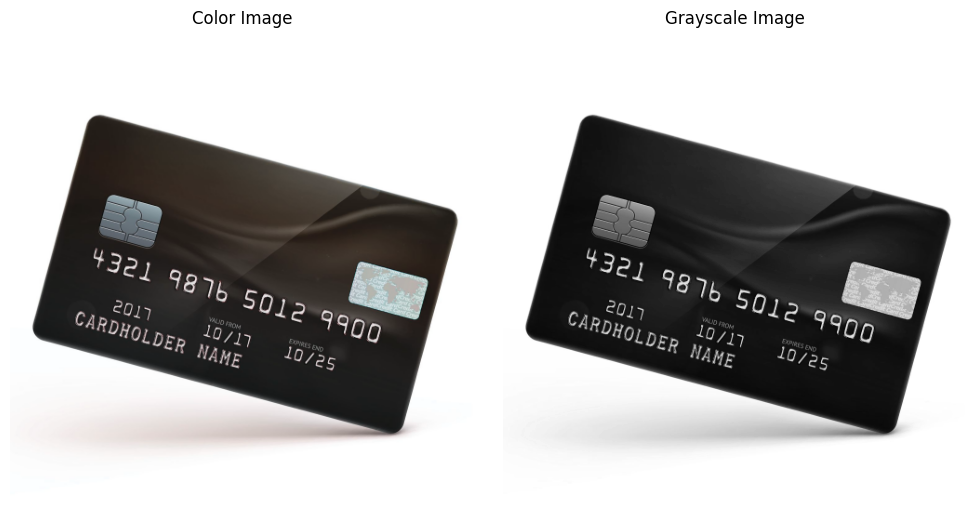

In [4]:
testcases = [cv2.imread('./testcases/01 - Straightforward.jpg'),
       cv2.imread('./testcases/02 - You can do it.jpg'),
       cv2.imread('./testcases/03 - Should be okay.jpg'),
       cv2.imread('./testcases/04 - Still ok, I hope.jpg'),
       cv2.imread('./testcases/05 - Looks cool, hope it runs cool too.jpg'),
       cv2.imread('./testcases/06 - Hatetlewe7 hatlewe7.jpg'),
       cv2.imread('./testcases/07 - Hatet3eweg hat3eweg.jpg'),
       cv2.imread('./testcases/08 - Ew3a soba3ak ya3am.jpg'),
       cv2.imread('./testcases/09 - El spero spathis we23et 3aaaa.jpg'),
      cv2.imread('./testcases/10 - Mal7 w Felfel.jpg'),
       cv2.imread('./testcases/11 - Ya setty ew3i.jpg'),
       cv2.imread('./testcases/12 - weewooweewoo.jpg') ,
       cv2.imread('./testcases/13 - Matozbot el camera ya Kimo.jpg'),
      cv2.imread('./testcases/14 - 2el noor 2ata3.jpg'),
       cv2.imread('./testcases/15 - Compresso Espresso.jpg'),
       cv2.imread('./testcases/16 - Sheel el kart yastaaaa.jpg'),
            
            ]
# image = cv2.imread('./testcases/Credit_Card_blank.jpg')
image = testcases[6-1]
image = imutils.resize(image, width=500 )
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(10, 5))  # Set the figure size

# Display the color image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(image)
plt.title('Color Image')
plt.axis('off')  # Hide the axis

# Display the grayscale image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(gray, cmap='gray')

plt.title('Grayscale Image')
plt.axis('off')  # Hide the axis

# Show the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Adding Kernals 

In [5]:
# initialize a rectangular (wider than it is tall) and square
# structuring kernel
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
# Create a smaller rectangular structuring element with size 5x2
smallRectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 2))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

Apply Gaussian Blur

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

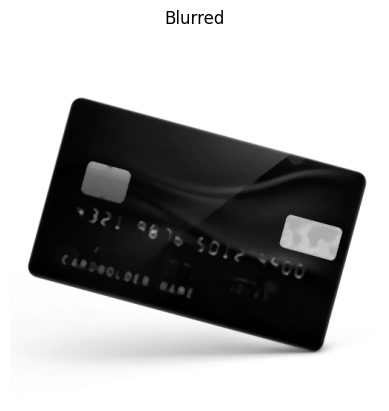

In [6]:
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# blurred = cv2.GaussianBlur(blurred, (5, 5), 0)
# blurred = cv2.GaussianBlur(blurred, (5, 5), 0)
# blurred = cv2.GaussianBlur(blurred, (5, 5), 0)


mean1 = cv2.medianBlur(gray.astype(np.uint8),5)
mean2 = cv2.medianBlur(mean1,5)
mean3 = cv2.medianBlur(mean2,5)
mean5 = cv2.medianBlur(mean3,3)
mean5 = (mean5 - mean5.min()) * (255/(mean5.max() - mean5.min()))
plt.imshow(mean5, cmap="gray")
# plt.imshow(blurred , cmap = 'gray')
plt.title('Blurred')
plt.axis('off')  # Hide the axis

Edge detection

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

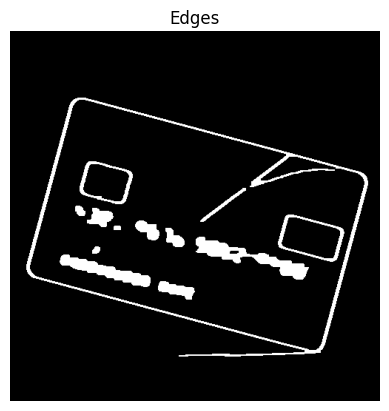

In [8]:
# Detect edges in the image using Canny edge detection
edges = cv2.Canny(mean3, 30, 150)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, rectKernel)
edges = cv2.morphologyEx(edges, cv2.MORPH_DILATE, smallRectKernel)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, rectKernel)
# edges = cv2.morphologyEx(edges, cv2.MORPH_ERODE ,sqKernel)


plt.imshow(edges , cmap = 'gray')
plt.title('Edges')
plt.axis('off')  # Hide the axis


Add Threshold 


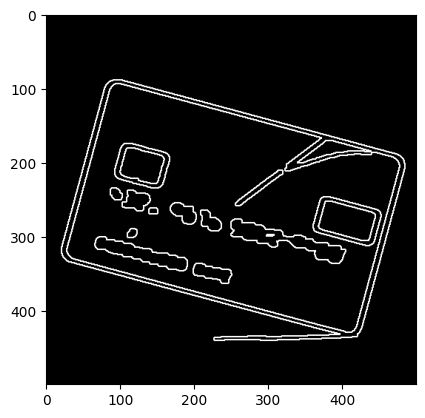

In [9]:
img_gray_threshed = cv2.adaptiveThreshold(src=edges.astype(np.uint8),
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=5,
    C=3
)

plt.imshow(img_gray_threshed, cmap="gray")

Find Contours


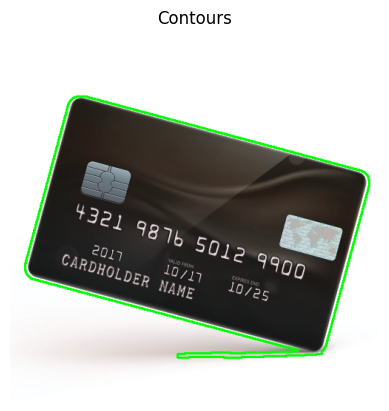

In [10]:
# Find contours in the edge-detected image
contours, _ = cv2.findContours(img_gray_threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Sort contours by area and keep the largest one, assuming it is the card
contours = sorted(contours, key=cv2.contourArea, reverse=True)
# Initialize a variable to hold the card contour
card_contour = None
# Iterate through the contours to find a suitable rectangular contour
for contour in contours:
    # Approximate the contour to a polygon
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.03 * peri, True)
    
    # If the approximated contour has four points, it might be the card
    if len(approx) == 4:
        card_contour = approx
        break
        
# Draw the contour of the card (for visualization)
if contours[0] is not None:
    cv2.drawContours(image, [contours[0]], -1, (0, 255, 0), 2)
    plt.imshow( image)
    plt.title('Contours')
    plt.axis('off')


Apply perspective Transform ??

Crop PAN Area
